In [36]:
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Q 1

We will preprocess the data and extract the data we want, according to the following sentence:

- **Score lead**. We believe that the difference in scores in the current game will significantly affect the player's mentality and indirectly affect the player's cash flow.

- **Stamina**. In the provided data set, we can measure the player's current physical strength through the distance traveled by the player.
- **Score streak**. We believe that whether consecutive points are scored in a game is also an important factor affecting a player's performance.
- **Mentality**. Losing points due to certain things during the game will affect the performance of the players, thereby indirectly affecting the performance.

Therefore, we will process the original data to obtain the following **evaluation indicators**:

|     evaluation indicators      |      Lable      |
| :----------------------------: | :-------------: |
|           Score lead           |   points_diff   |
| Running distance in this match | total_distance  |
|          Score streak          |  points_streak  |
|         unforced error         |     unf_err     |
|        Whether to serve        |     server      |
|     serve score(untouched)     |   serve_score   |
|      Last round duration       | elapsed_time_td |
|                                |                 |

In [55]:
path = 'E:\MEM-Problem-C\data\data_processed.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['match_id'], axis=1)
data = pd.read_csv(path)
dataset = dataset[:6950]

,p1_diffp,p1_distance_run,p1_win_streak,p1_unf_err,p1_serve,p1_ace,elapsed_time,p1_net_pt_won,p1_label
0,0,6.000,0,1,1,0,0,0,0
1,-1,5.253,0,0,1,0,38,0,1
2,0,13.800,1,1,1,0,23,0,0
3,-1,51.108,0,0,1,0,30,0,1
4,0,0.649,1,0,1,1,50,0,1
...,...,...,...,...,...,...,...,...,...
6945,0,20.049,0,0,0,0,103,0,0
6946,-1,4.559,0,0,1,0,43,0,1
6947,0,11.609,1,1,1,0,41,0,0
6948,-1,14.626,0,1,0,0,49,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = dataset.columns[:-1]
scaler.fit(dataset[columns].values)
dataset[columns] = scaler.transform(dataset[columns].values)
dataset.to_excel('tar_data.xlsx',index=False)

![image-20240203013357618](C:\Users\40633\AppData\Roaming\Typora\typora-user-images\image-20240203013357618.png)

In [57]:
import warnings
warnings.filterwarnings("ignore")

def function(model):
    auc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='roc_auc').mean(),2)
    acc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='accuracy').mean(),2)
    recall = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='recall').mean(),2)
    precision = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='precision').mean(),2)
    f1 = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='f1').mean(),2)
    return acc,recall,precision,f1,auc

model = LGBMClassifier(random_state=30,force_col_wise=True)
print(f'LGBMClassifier acc,recall,precision,f1,auc :{function(model)}')
model = XGBClassifier(random_state=50)
print(f'XGBClassifier acc,recall,precision,f1,auc :{function(model)}')
model = SVC(random_state=50)
print(f'SVC acc,recall,precision,f1,auc :{function(model)}')
model = MLPClassifier(random_state=60)
print(f'MLPClassifier acc,recall,precision,f1,auc :{function(model)}')
model = LogisticRegression(random_state=50)
print(f'LogisticRegression acc,recall,precision,f1,auc :{function(model)}')

[LightGBM] [Info] Number of positive: 2840, number of negative: 2720
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 5560, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510791 -> initscore=0.043172
[LightGBM] [Info] Start training from score 0.043172
[LightGBM] [Info] Number of positive: 2840, number of negative: 2720
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 5560, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510791 -> initscore=0.043172
[LightGBM] [Info] Start training from score 0.043172
[LightGBM] [Info] Number of positive: 2840, number of negative: 2720
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 5560, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510791 -> initscore=0.043172
[LightGBM] [Info] Start training from score 0.043172
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 2846, number of negative: 2714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 5560, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511871 -> initscore=0.047491
[LightGBM] [Info] Start training from score 0.047491


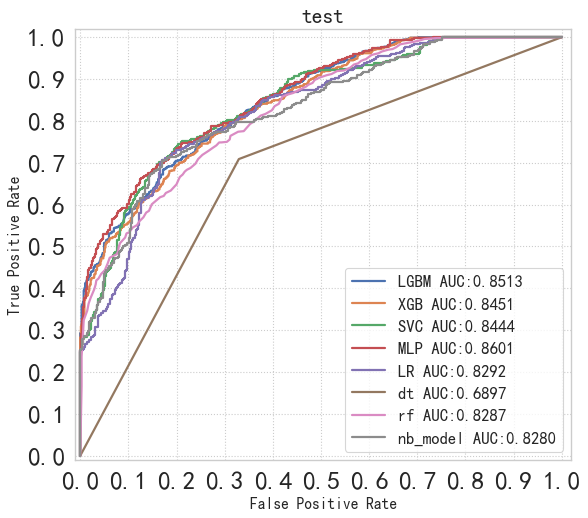

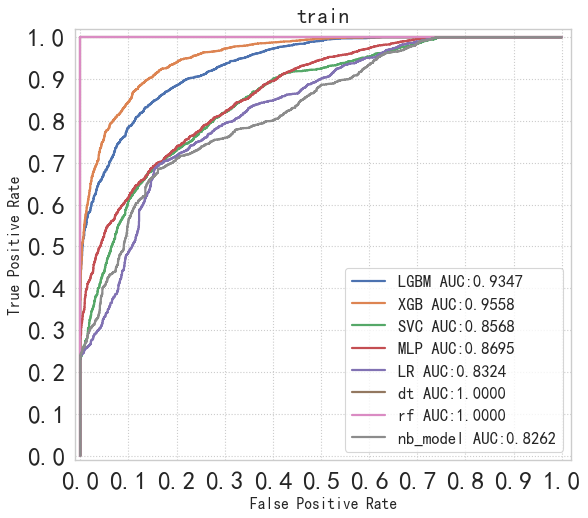

In [58]:
import numpy as np
from  sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

def f(model_list,name_list,types='train'):
    plt.figure(figsize=(8, 7), dpi=80, facecolor='w')    # dpi:每英寸长度的像素点数；facecolor 背景颜色
    plt.xlim((-0.01, 1.02))  # x,y 轴刻度的范围
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))  #绘制刻度
    plt.yticks(np.arange(0, 1.1, 0.1))

    if types == 'test':
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xvalid)[:,1]
            fpr, tpr, _ = metrics.roc_curve(yvalid, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '-', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    else:
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xtrain)[:,1]
            fpr, tpr, _ = metrics.roc_curve(ytrain, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '-', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    plt.legend(loc='lower right',fontsize=15)    # 设置显示标签的位置
    plt.xlabel('False Positive Rate', fontsize=14)   #绘制x,y 坐标轴对应的标签
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.tick_params(labelsize=23)

    plt.grid(True, ls=':')  # 绘制网格作为底板;b是否显示网格线；ls表示line style
    plt.savefig(f'results\\roc_auc({types}).png',dpi=500)
    plt.title(types)
    plt.show()


xtrain, xvalid, ytrain, yvalid = train_test_split(dataset[columns].values,dataset['p1_label'].values,random_state=620,test_size=0.2)

model1 = LGBMClassifier(random_state=30)
model2 = XGBClassifier(random_state=50)
model3 = SVC(probability=True,random_state=50)
model4 = MLPClassifier(random_state=60)
model5 = LogisticRegression(random_state=50)
dt_model = DecisionTreeClassifier(random_state=50)
rf_model = RandomForestClassifier(random_state=50)
nb_model = GaussianNB()


# 随机森林

model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)
model4.fit(xtrain,ytrain)
model5.fit(xtrain,ytrain)
dt_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)
nb_model.fit(xtrain, ytrain)

f([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'test')
f([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'train')

We comprehensively compared the training results of LGBM, XGBC, SVM, MLP, Logistic Regression, Decision Tree, Random Forest, Naive Bayes and other models.

It was found that the MLP model has the best prediction result, so we choose the MLP model for the 30th game 2023-wimbledon-1701 Make predictions and get performance graphs

In [63]:
index = data[data.match_id==30].reset_index(drop=True).index
test = dataset.iloc[index]
print(index)
train = dataset.drop(index,axis=0)
model = MLPClassifier(random_state=60)
model.fit(train[columns].values,train['p1_label'].values)
pred = model.predict_proba(test[columns].values)
pred = pd.DataFrame({'score':pred[:,0]})

RangeIndex(start=0, stop=334, step=1)


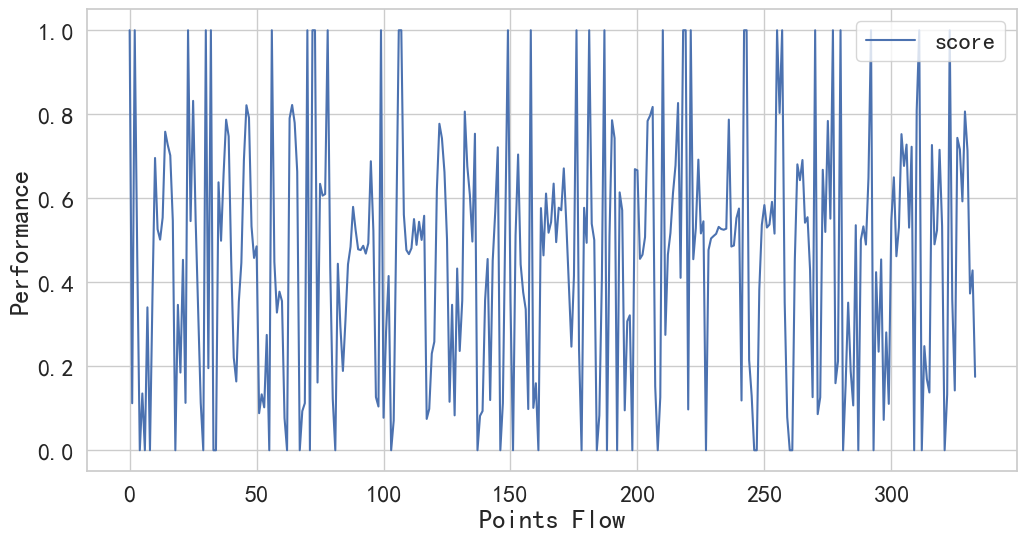

In [70]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt


pred.plot(kind = "line",figsize = (12,6)) #颜色,matplotlib
plt.xticks(rotation=0)
plt.xlabel("Points Flow")
plt.ylabel("Performance")
plt.savefig('results\\match_flow_prediction.png',dpi=500)
plt.show()

Then, in order to find the weight relationship between features and results, we focused on analyzing the LGBM and LR models, and obtained the following two feature weight maps

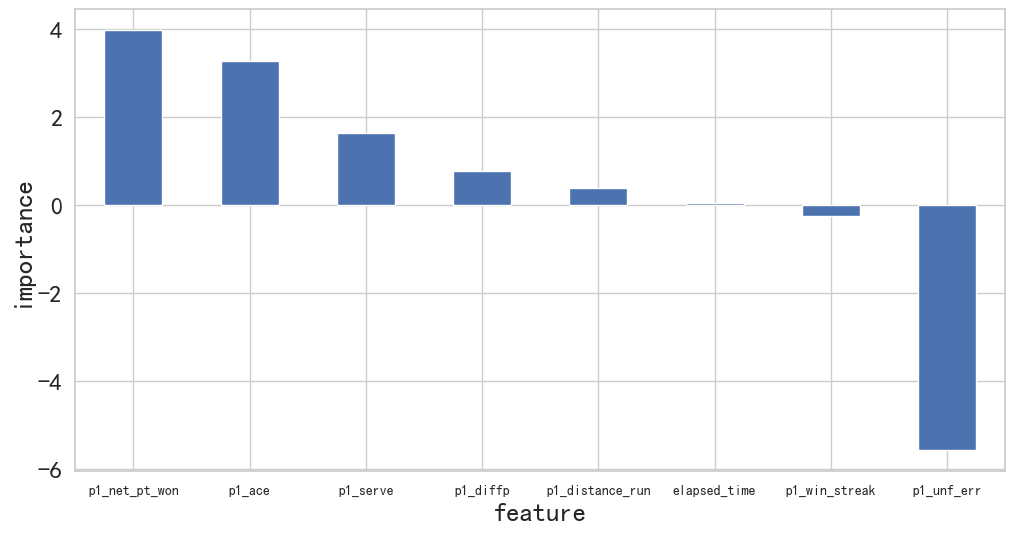

In [72]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model5.coef_[0]}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 0,fontsize = 10)
plt.savefig('results\\LR-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()

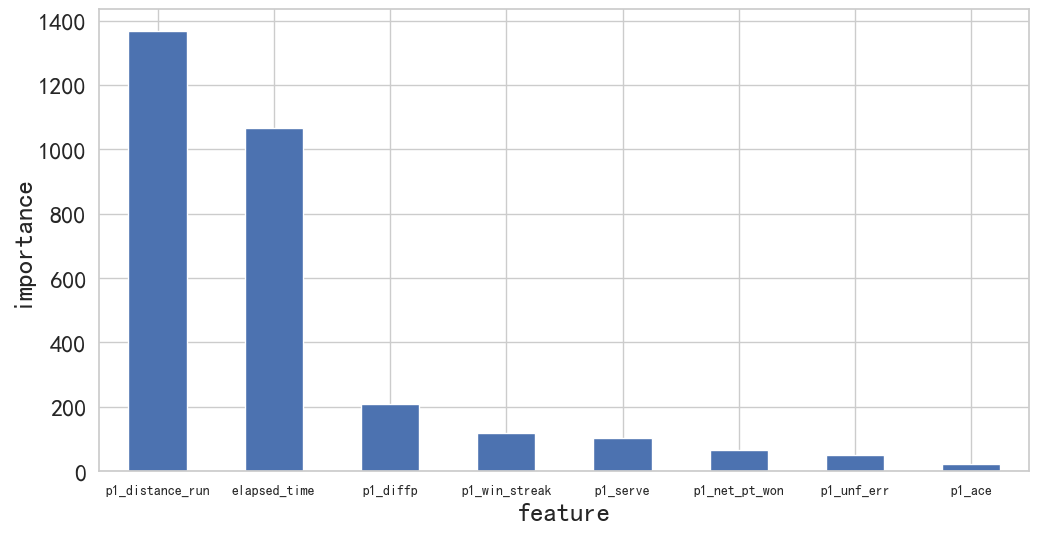

In [73]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model1.feature_importances_}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 0,fontsize = 10)
plt.savefig('results\\LGBM-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()